# Toy Example

# Preparation

## Import package

In [1]:
import math
import sys

sys.path.append('../')

In [2]:
from src import mc, mc_decomp, posterior_g, posterior_h

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize

## Create original cmap

In [11]:
def create_cmap(colors):
    """Create original cmap.

    Args:
        colors (List[str]): edge colors for cmap.
    Returns:
        LinearSegmentedColormap: original cmap.
    """
    return LinearSegmentedColormap.from_list('custom_cmap', colors)

# Introductory figure

MC for $x_1, \dots, x_{200}$, where
$$
    x_n \sim
    \begin{cases}
        \mathcal{N}(x | \mu = [0.0, 0.0]^\top, \Sigma = I_2) & n = 1, \dots, 100 + \mathrm{bias} \\
        \mathcal{N}(x | \mu = [\mathrm{shift}, 0.0]^\top, \Sigma = I_2) & n = 101 + \mathrm{bias}, \dots, 200.
    \end{cases}
$$

In [5]:
def introductory_figure(*, shift=6.0, bias=0, random_state=None, save_name=None):
    """Plot example(GMM with mixture size two).

    Args:
        shift (float): position of the mean.
        bias (int): weight bias.
    """
    # set gmm_parameters
    pi = np.array([(100 + bias) / 200, (100 - bias) / 200])
    means = np.array([[0., 0.], [shift, 0.]])
    covariances = [np.eye(2), np.eye(2)]
    gmm_parameters = {'pi': pi, 'means': means, 'covariances': covariances}

    # create X
    random = np.random.RandomState(random_state)
    X_1 = random.randn(100 + bias, 2)
    X_2 = random.randn(100 - bias, 2)
    X_2[:, 0] += shift
    X = np.r_[X_1, X_2]
    
    # calculate MC and posterior probability
    mixture_complexity = mc(X=X, **gmm_parameters)
    posterior_prob = posterior_g(X=X, **gmm_parameters)

    # plot setting
    fig, ax = plt.subplots(figsize=(3, 2), dpi=200)
    ax.set_xlim(-4.0, 10.0)
    ax.set_ylim(-4.0, 4.0)
    for a in ['top', 'right', 'bottom', 'left']:
        ax.spines[a].set_linewidth(0.5)
    ax.tick_params(labeltop=False, labelright=False,
                   labelbottom=False, labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.subplots_adjust(top=0.81, right=0.98, bottom=0.02, left=0.02)

    # plots
    color_kwargs = {
        'c': posterior_prob[:, 1],
        'cmap': create_cmap(['yellow', 'red']),
        'norm': Normalize(vmin=0.0, vmax=1.0)
    }
    ax.scatter(X[:, 0], X[:, 1], s=30, **color_kwargs)
    ax.scatter(means[0][0], means[0][1], marker='x', color='black')
    ax.scatter(means[1][0], means[1][1], marker='x', color='black')

    # title and save
    ax.set_title('exp(MC) = {:.3f}'.format(
        np.exp(mixture_complexity)), fontsize=20)
    if save_name:
        plt.savefig('../images/{}'.format(save_name))
    plt.show()

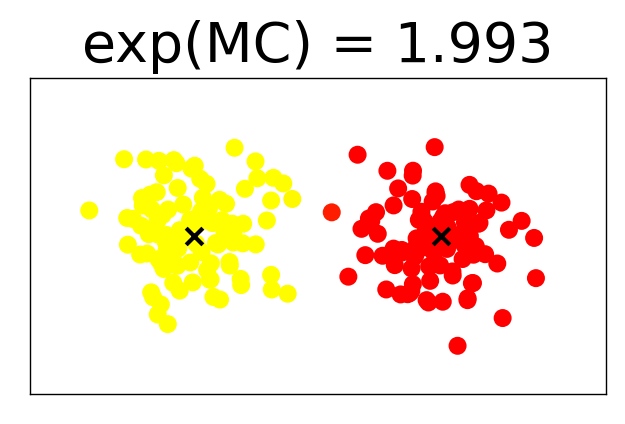

In [6]:
introductory_figure(
    shift=6.0, bias=0, random_state=0, save_name='Introduction1.png'
)

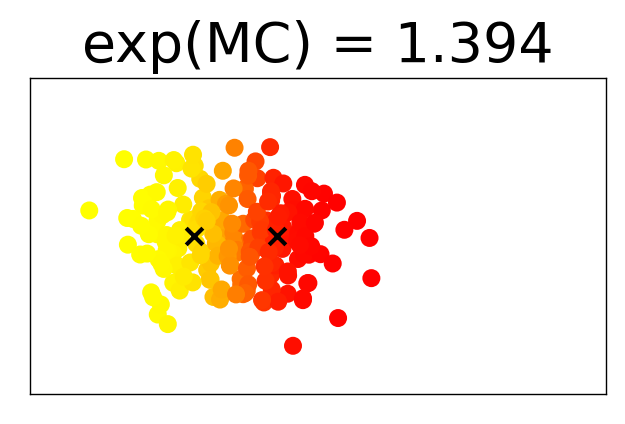

In [7]:
introductory_figure(
    shift=2.0, bias=0, random_state=0, save_name='Introduction2.png'
)

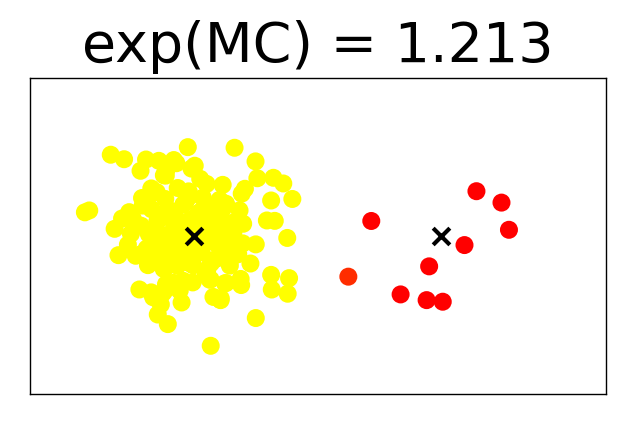

In [8]:
introductory_figure(
    shift=6.0, bias=90, random_state=0, save_name='Introduction3.png'
)

# GMM with different overlaps

## Experiments

In [9]:
random = np.random.RandomState(seed=0)
alpha_list = np.arange(11) * 0.6

mc_list = []
for i, alpha in enumerate(alpha_list):

    # set gmm_parameters
    pi = np.array([0.5, 0.5])
    means = np.array([[0.0, 0.0], [alpha, 0.0]])
    covariances = [np.eye(2), np.eye(2)]
    gmm_parameters = {'pi': pi, 'means': means, 'covariances': covariances}

    # create X
    X_1 = random.randn(300, 2)
    X_2 = random.randn(300, 2)
    X_2[:, 0] += alpha
    X = np.r_[X_1, X_2]

    # calculate MC
    
    mc_list.append(mc(X=X, **gmm_parameters))

## Results

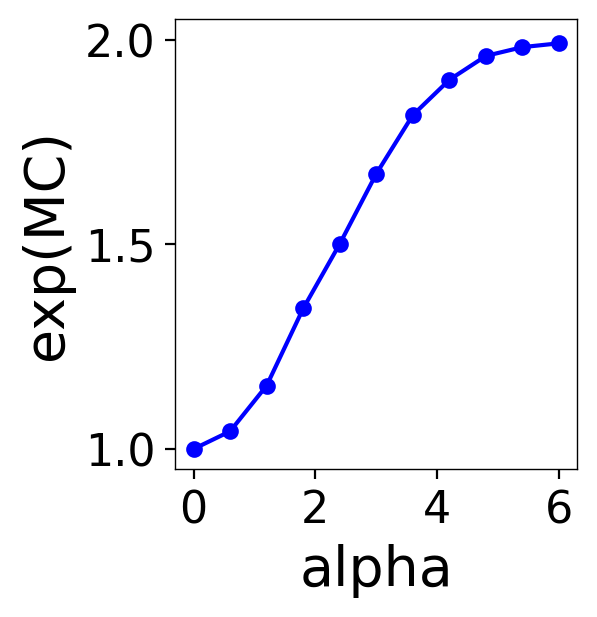

In [10]:
# plot setting
fig, ax = plt.subplots(figsize=(3.0, 3.0), dpi=200)
ax.set_xlim(-0.3, 6.3)
ax.set_ylim(0.95, 2.05)
for a in ['top', 'right', 'bottom', 'left']:
    ax.spines[a].set_linewidth(0.5)
ax.tick_params(labelsize=16)
ax.set_xticks([0, 2, 4, 6])
ax.set_yticks([1.0, 1.5, 2.0])
ax.set_xlabel('alpha', fontsize=20)
ax.set_ylabel('exp(MC)', fontsize=20)
plt.subplots_adjust(top=0.98, right=0.94, bottom=0.23, left=0.27)

# plot exp(MC)
ax.plot(alpha_list, np.exp(mc_list), color='blue', marker='o', markersize=5)

# GMM with different weight bias

## Experiments

In [11]:
random = np.random.RandomState(seed=1)
alpha_list = np.arange(11) * 30

mc_list = []
for i, alpha in enumerate(alpha_list):

    # set gmm_parameters
    pi = np.array([(300 + alpha) / 600, (300 - alpha) / 600])
    means = np.array([[0.0, 0.0], [6.0, 0.0]])
    covariances = [np.eye(2), np.eye(2)]
    gmm_parameters = {'pi': pi, 'means': means, 'covariances': covariances}

    # create X
    X_1 = random.randn(300 + alpha, 2)
    X_2 = random.randn(300 - alpha, 2)
    X_2[:, 0] += 6.0
    X = np.r_[X_1, X_2]
    
    # calculate MC
    mc_list.append(mc(X=X, **gmm_parameters))

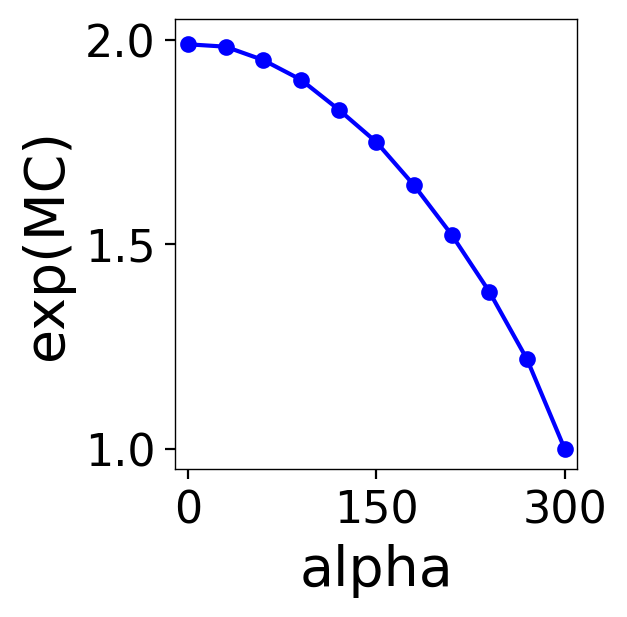

In [12]:
# plot setting
fig, ax = plt.subplots(figsize=(3.0, 3.0), dpi=200)
ax.set_xlim(-10, 310)
ax.set_ylim(0.95, 2.05)
for a in ['top', 'right', 'bottom', 'left']:
    ax.spines[a].set_linewidth(0.5)
ax.tick_params(labelsize=16)
ax.set_xticks([0, 150, 300])
ax.set_yticks([1.0, 1.5, 2.0])
ax.set_xlabel('alpha', fontsize=20)
ax.set_ylabel('exp(MC)', fontsize=20)
plt.subplots_adjust(top=0.98, right=0.94, bottom=0.23, left=0.27)

# plot exp(MC)
ax.plot(alpha_list, np.exp(mc_list), color='blue', marker='o', markersize=5)

# Example of decomposition

## Sample data

In [4]:
pi = np.ones(4) * 0.25
means = np.array([[-3.0, -2.0], [-1.8, 1.0], [1.8, 1.0], [3.0, -0.5]])
covariances = [np.eye(2) for i in range(4)]
gmm_parameters = {'pi': pi, 'means': means, 'covariances': covariances}

partition = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])

random = np.random.RandomState(2)
X_0 = random.randn(100, 2) + means[0]
X_1 = random.randn(100, 2) + means[1]
X_2 = random.randn(100, 2) + means[2]
X_3 = random.randn(100, 2) + means[3]
X = np.r_[X_0, X_1, X_2, X_3]

## Calculate decomposition

In [5]:
mc_total = mc(X=X, **gmm_parameters)
mc_interaction, W, mc_local = mc_decomp(
    X=X, **gmm_parameters, partition=partition
)

print('MC (total)      ', mc_total)
print('MC (interaction)', mc_interaction)
print('W               ', W)
print('MC (local)      ', mc_local)
print('recover total   ', mc_interaction + np.dot(W, mc_local))

MC (total)       1.0742240764435738
MC (interaction) 0.6426328805618632
W                [0.49612813 0.50387187]
MC (local)       [0.55745142 0.30766525]
recover total    1.0742240764435733


## Calculate posterior probabilities

In [6]:
posterior_prob_g = posterior_g(X=X, **gmm_parameters)
posterior_prob_h = posterior_h(X=X, **gmm_parameters, partition=partition)

## Plot Results

In [7]:
def _plot_setting(ax):
    """Plot setting

    Args:
        ax (matplotlib.axes.Axes): axes
    """
    ax.set_xlim(-8, 8)
    ax.set_ylim(-6, 6)
    ax.tick_params(labeltop=False, labelright=False,
                   labelbottom=False, labelleft=False)
    ax.set_xticks([], minor=False)
    ax.set_yticks([], minor=False)
    for a in ['top', 'right', 'bottom', 'left']:
        ax.spines[a].set_linewidth(0.5)
    plt.subplots_adjust(top=0.86, right=0.98, bottom=0.02, left=0.02)

In [8]:
def _plot_circle(ax, center):
    """plot circle with radious 2.0

    Args:
        ax (matplotlib.axes.Axes): axes.
        center (ndarray, shape=(2,)): center of the circle.
    """

    coss = np.cos([0.01 * i * math.pi for i in range(201)])
    sins = np.sin([0.01 * i * math.pi for i in range(201)])
    ellipse = center + 2.0 * np.c_[coss, sins]
    ax.plot(ellipse[:, 0], ellipse[:, 1], color='black', linewidth=1.0)

In [9]:
def _plot_X(ax, c, cmap):
    """plot X

    Args:
        ax (matplotlib.axes.Axes): axes.
        c (ndarray, shape=(M,)): color for each sample.
        cmap (LinearSegmentedColormap): cmap.
    """
    color_kwargs = {
        'c': c,
        'cmap': cmap,
        'norm': Normalize(vmin=0.0, vmax=1.0)
    }
    ax.scatter(X[:, 0], X[:, 1], s=20, **color_kwargs)

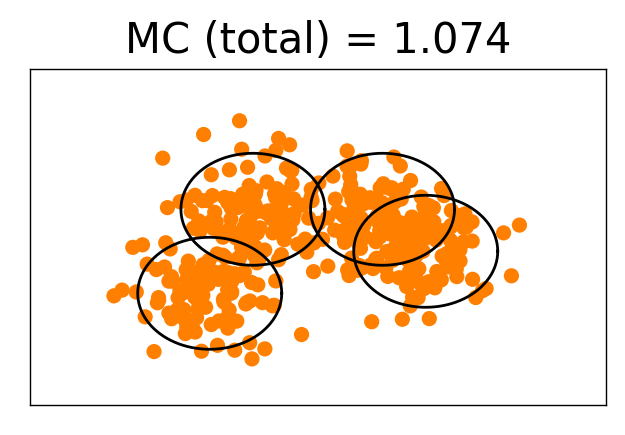

In [12]:
fig, ax = plt.subplots(figsize=(3.0, 2.0), dpi=200)

_plot_setting(ax)
_plot_X(ax, c=np.full(400, 0.5), cmap=create_cmap(['yellow', 'red']))
for i in [0, 1, 2, 3]:
    _plot_circle(ax, center=means[i])

ax.set_title('MC (total) = {:.3f}'.format(mc_total), fontsize=15)
plt.show()

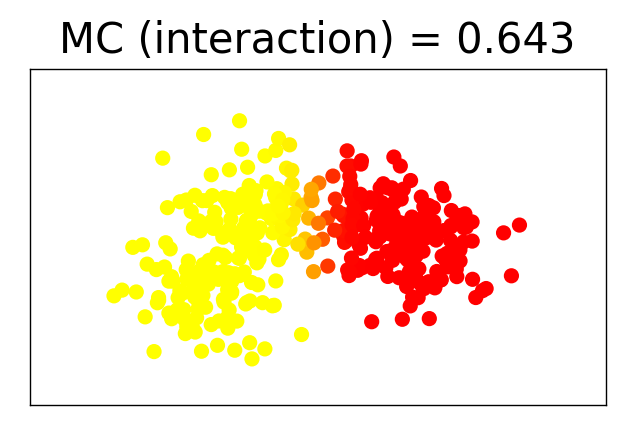

In [13]:
fig, ax = plt.subplots(figsize=(3.0, 2.0), dpi=200)

_plot_setting(ax)
_plot_X(ax, c=posterior_prob_h[:, 1], cmap=create_cmap(['yellow', 'red']))

ax.set_title('MC (interaction) = {:.3f}'.format(mc_interaction), fontsize=15)
plt.show()

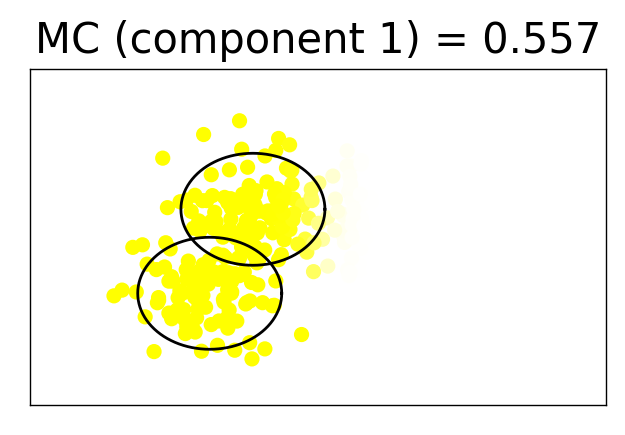

In [14]:
fig, ax = plt.subplots(figsize=(3.0, 2.0), dpi=200)

_plot_setting(ax)
_plot_X(ax, c=posterior_prob_h[:, 0], cmap=create_cmap(['white', 'yellow']))

for i in [0, 1]:
    _plot_circle(ax, center=means[i])

ax.set_title('MC (component 1) = {:.3f}'.format(mc_local[0]), fontsize=15)
plt.show()

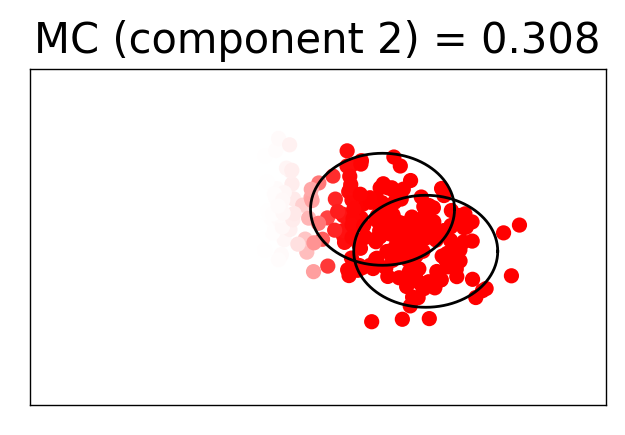

In [15]:
fig, ax = plt.subplots(figsize=(3.0, 2.0), dpi=200)

_plot_setting(ax)
_plot_X(ax, c=posterior_prob_h[:, 1], cmap=create_cmap(['white', 'red']))

for i in [2, 3]:
    _plot_circle(ax, center=means[i])

ax.set_title('MC (component 2) = {:.3f}'.format(mc_local[1]), fontsize=15)
plt.show()